# Netflix Movies Analysis
--------

Netflix is a streaming service that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices.

## Setting up our environment
-------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print ('ready')

ready


## Import The Netflix Dataset
--------

In [2]:
netflix_df = pd.read_csv('./dataset/netflix_titles.csv')

In [3]:
#Take a look at the dataset
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
# checking information about the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


We have 6234 entries and 12 columns present in the dataset,we can also see that there are some columns with null values alreadt like (director,cast,country,date_added,rating).

In [5]:
# We can see the amount of unique values present in each of the columns
netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

We can see that show_id has the highest number of unique values because every show in netflix has a unique code attached to it,description also has high amount of unique values and we can also see cast also with also high amount of unique values present

In [6]:
#checking the columns that have null values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

So we can see that show id,type,title,release year,duration,listed_in,description does not have any null values while the director has the highest number of null values present in the dataset.cast,country,date_added and rating also have certain amount of null values present.

In [7]:
# Fill the null values up and drop the ones that should be dropped
netflix_df.fillna(value ={'director':'No Director'}, inplace  = True )
netflix_df.fillna(value ={'cast':"No Cast"},inplace =  True)
netflix_df.fillna(value ={'country':'country unavailable'},inplace = True)
netflix_df.dropna(subset = ['date_added','rating'],inplace = True)

In [8]:
#Checking to see if we still have null values present
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
#Checking the unique values in the type column
netflix_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
# lets split the data in the two different types of netflix titles present in the dataset
netflix_show = netflix_df.loc[netflix_df.type == 'TV Show']
netflix_movie = netflix_df.loc[netflix_df.type == 'Movie']


In [ ]:
netflix_movie.duration = netflix_movie.duration.str.replace(' min','').astype(int)
netflix_show.rename(columns = {'duration':'seasons'},inplace = True)
netflix_show.replace({'seasons':{'1 Season':'1 Seasons'}},inplace = True)
netflix_show.seasons = netflix_show.seasons.str.replace(' Seasons','').astype(int)

Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

------
## Exploratory Data Analysis And Visualization

--------
#### Number of movies and shows present in the dataset

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Count')

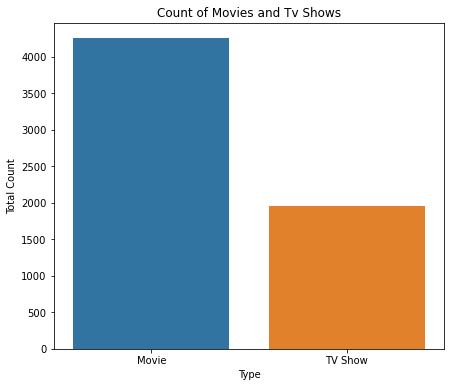

In [12]:
plt.figure(figsize =(7,6))
sns.countplot(netflix_df.type)
plt.title("Count of Movies and Tv Shows")
plt.xlabel("Type")
plt.ylabel("Total Count")

#### percentage of Tv show and movies

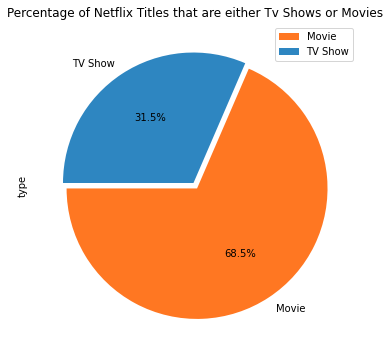

In [13]:
plt.figure(figsize = (12,6))
netflix_df.type.value_counts().plot(kind = 'pie',explode=(0.025,0.025),labels = netflix_df.type.value_counts().index, autopct = '%.1f%%', colors = ['#ff7722', '#2E86C1'],startangle = 180)
plt.title("Percentage of Netflix Titles that are either Tv Shows or Movies")
plt.legend(loc = "upper right")
plt.show()

#### Netflix_Rating

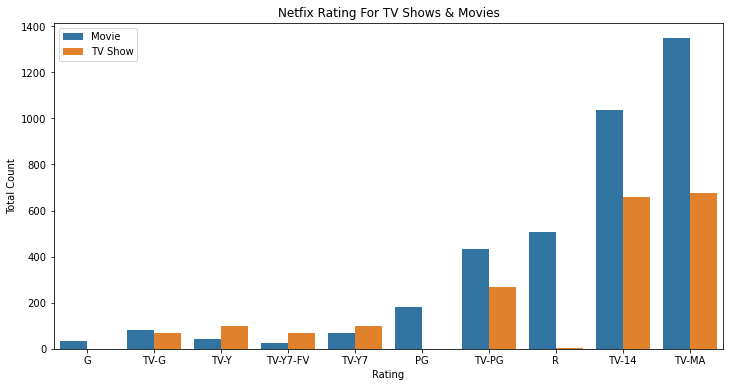

In [14]:
order = ['G','TV-G','TV-Y','TV-Y7-FV','TV-Y7','PG','TV-PG','R','TV-14','TV-MA']
plt.figure(figsize = (12,6))
sns.countplot(x=netflix_df.rating,hue=netflix_df.type,order = order, data=netflix_df)
plt.title("Netfix Rating For TV Shows & Movies")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.legend()
plt.show()
           

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


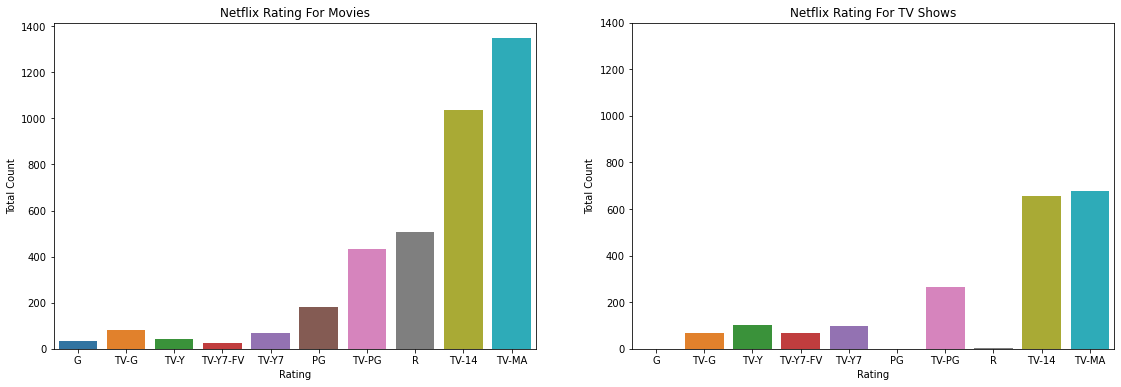

In [15]:
# netflix rating in movies
plt.figure(figsize = (19,6))
plt.subplot(1,2,1)
sns.countplot(netflix_movie.rating,order = order,data = netflix_movie)
plt.title("Netflix Rating For Movies")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.subplot(1,2,2)
sns.countplot(netflix_show.rating,order = order,data = netflix_show)
plt.yticks(np.arange(0,1600,200))
plt.title("Netflix Rating For TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

#### Content Added Per Year

In [ ]:
#Extracting the year and month from the date_added column to form two new columns called year_added and month_added
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_movie['year_added'] = pd.DatetimeIndex(netflix_movie['date_added']).year
netflix_show['year_added'] = pd.DatetimeIndex(netflix_show['date_added']).year
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month
netflix_movie['month_added'] = pd.DatetimeIndex(netflix_movie['date_added']).month
netflix_show['month_added'] = pd.DatetimeIndex(netflix_show['date_added']).month

In [17]:
netflix_year = netflix_df['year_added'].value_counts().to_frame()
netflix_year.reset_index(inplace = True)
netflix_year.rename(columns = {'index' : 'year','year_added':'count'}, inplace = True)
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year.head()

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88


Text(0, 0.5, 'Content Count')

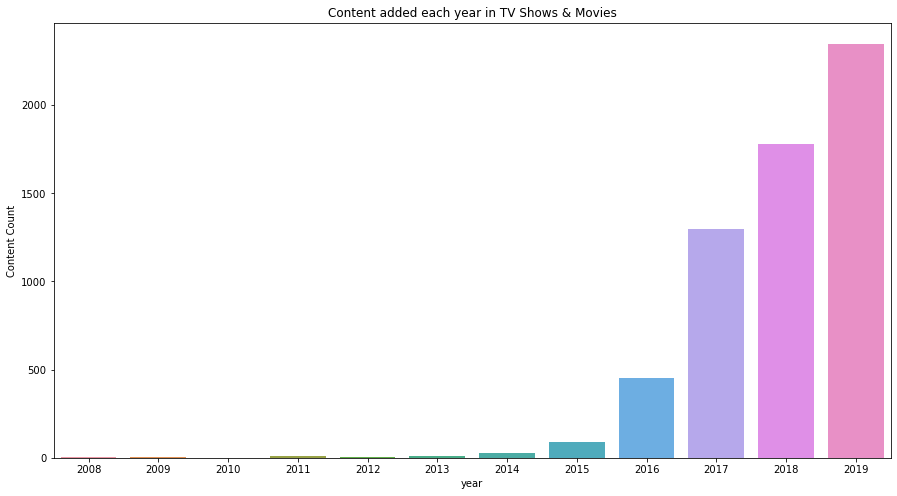

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'year', y = 'count',data = netflix_year)
plt.title('Content added each year in TV Shows & Movies')
plt.xlabel('year')
plt.ylabel('Content Count')

In [19]:
netflix_movie_year = netflix_movie['year_added'].value_counts().to_frame()
netflix_movie_year.reset_index(inplace = True)
netflix_movie_year.rename(columns = {'index' : 'year','year_added':'count'}, inplace = True)
netflix_movie_year = netflix_movie_year[netflix_movie_year.year != 2020]
netflix_show_year = netflix_show['year_added'].value_counts().to_frame()
netflix_show_year.reset_index(inplace = True)
netflix_show_year.rename(columns = {'index' : 'year','year_added':'count'}, inplace = True)
netflix_show_year = netflix_show_year[netflix_show_year.year != 2020]

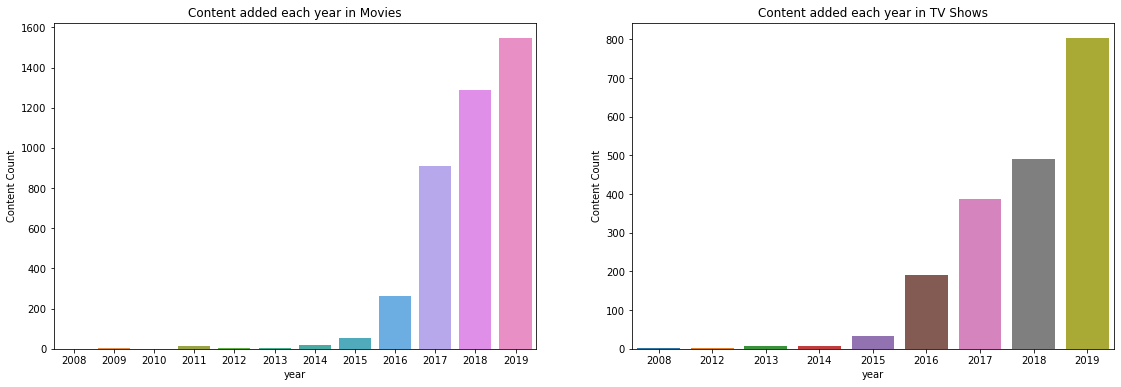

In [20]:
# content added each year for Tv show and Movies
plt.figure(figsize = (19,6))
plt.subplot(1,2,1)
sns.barplot(x = 'year', y = 'count',data = netflix_movie_year)
plt.title('Content added each year in Movies')
plt.xlabel('year')
plt.ylabel('Content Count')
plt.subplot(1,2,2)
sns.barplot(x = 'year', y = 'count',data = netflix_show_year)
plt.title('Content added each year in TV Shows')
plt.xlabel('year')
plt.ylabel('Content Count')
plt.show()

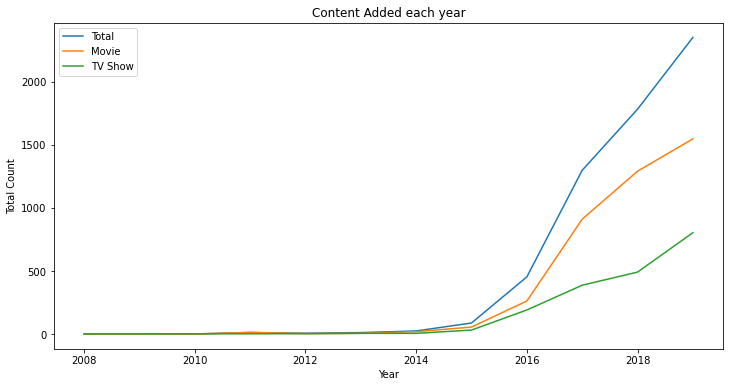

In [21]:
#let us visualize with a lineplot to see the trend of content added between the Tv show and movies
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'count',data = netflix_year)
sns.lineplot(x = 'year', y = 'count',data = netflix_movie_year)
sns.lineplot(x = 'year', y = 'count',data = netflix_show_year)

plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Content Added each year')
plt.legend(['Total','Movie','TV Show'])

#### Netflix Film Duration

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


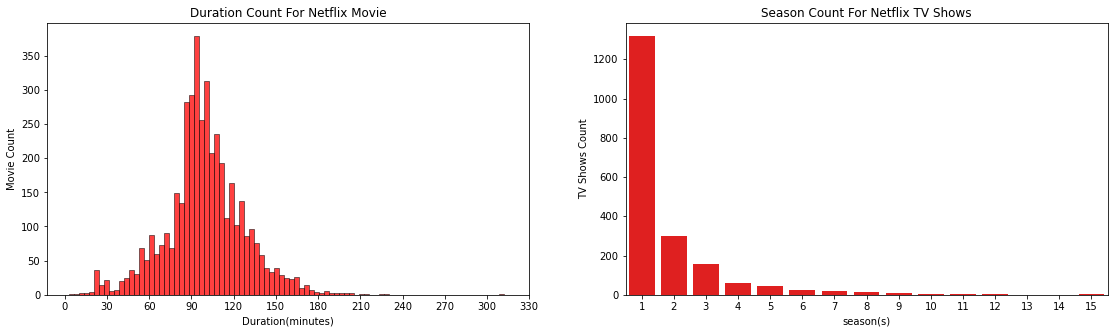

In [22]:
plt.figure(figsize = (19,5))
plt.subplot(1,2,1)
sns.histplot(netflix_movie.duration,color = 'red')
plt.xticks(np.arange(0,360,30))
plt.ylabel('Movie Count')
plt.xlabel('Duration(minutes)')
plt.title('Duration Count For Netflix Movie')
plt.subplot(1,2,2)
sns.countplot(netflix_show.seasons,color = 'red')
plt.ylabel('TV Shows Count')
plt.xlabel('season(s)')
plt.title('Season Count For Netflix TV Shows') 
plt.show()


#### Countries with the most content available

In [23]:
# we need to seperate all countries within a film and removing titles with no countries available before we analyze
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'country unavailable']
fc = filtered_countries.value_counts().index[:10]

Text(0.5, 1.0, 'Top 10 Countries on Netflix')

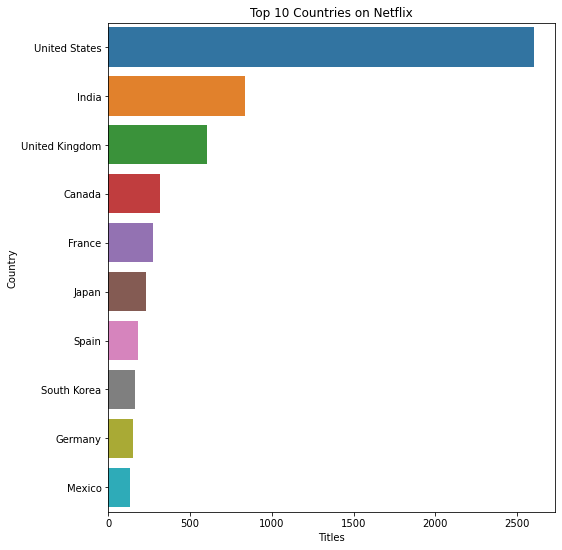

In [24]:
plt.figure(figsize = (8,9))
sns.countplot(y = filtered_countries,order = fc)
plt.xlabel('Titles')
plt.ylabel('Country')
plt.title('Top 10 Countries on Netflix')

#### Genre with the most content available


In [25]:
# we need to seperate all listed_in within a film  before we analyze
filtered_listed_in = netflix_df.set_index('title').listed_in.str.split(', ',expand = True).stack().reset_index(level=1,drop=True);
fl = filtered_listed_in.value_counts().index[:20]

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

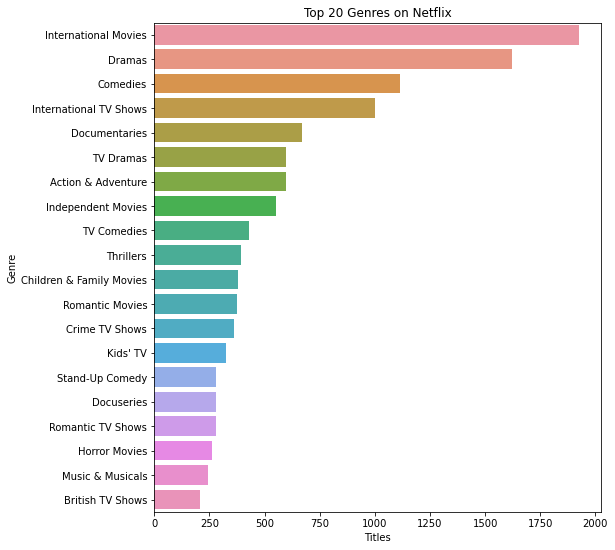

In [26]:
plt.figure(figsize = (8,9))
sns.countplot(y = filtered_listed_in,order = fl)
plt.xlabel('Titles')
plt.ylabel('Genre')
plt.title('Top 20 Genres on Netflix')

### Lets Answer Some Questions?

------
#### Top 10 directors with the most release?

In [27]:
# we need to seperate all directors within a film and removing titles with no director available before we analyze
filtered_directors = netflix_df.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_directors = filtered_directors[filtered_directors != 'No Director']
fd = filtered_directors.value_counts().index[:10]

Text(0.5, 1.0, 'Top 10 Directors on Netflix')

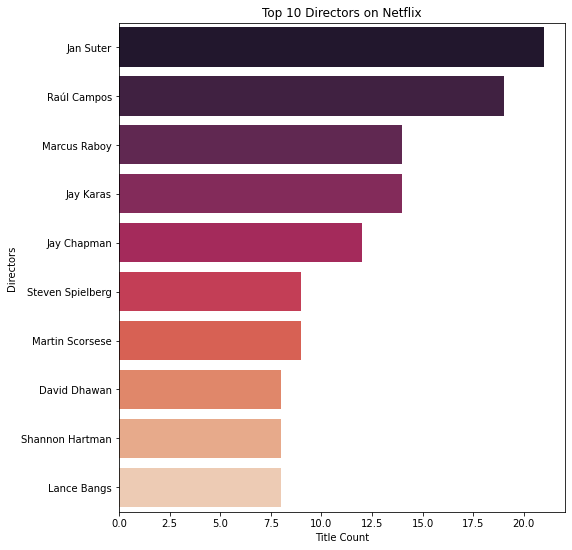

In [28]:
plt.figure(figsize = (8,9))
sns.countplot(y = filtered_directors,order = fd,palette='rocket')
plt.xlabel('Title Count')
plt.ylabel('Directors')
plt.title('Top 10 Directors on Netflix')

#### Top 20 Actors On Netflix?

In [29]:
# we need to seperate all cast within a film and removing titles with no cast available before we analyze
filtered_casts = netflix_df.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_casts = filtered_casts[filtered_casts != 'No Cast']
ff = filtered_casts.value_counts().index[:20]

Text(0.5, 1.0, 'Top 20 Actors on Netflix')

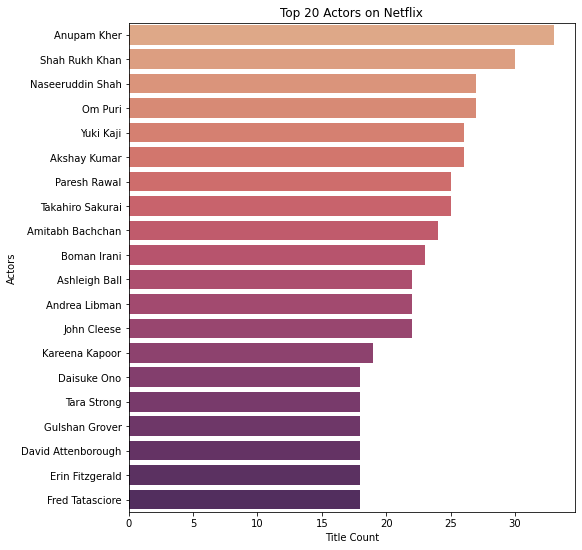

In [30]:
plt.figure(figsize = (8,9))
sns.countplot(y = filtered_casts,order = ff,palette='flare')
plt.xlabel('Title Count')
plt.ylabel('Actors')
plt.title('Top 20 Actors on Netflix')

# **Insight From The Data**
--------
With the exploratory data analysis and answered question on Netflix Titles, the following points are concluded
> 1. From The Dataset we can see that Movies are more on netflix compared to TV Shows
> 2. We can see that most Movies and TV Shows are rated TV-MA(Matured Audience) on Netflix
> 3. The content added to netflix added each year started increasing gradually from 2015,between 2008 and 2014 it was pretty stagnant
> 4. We can see that the duration(minutes) of most movies lies between 90 - 110 mins,so most movies on netflix are mostly around 1hr 30 mins.
> 5. The Duration of Most TV Shows on Netflix are mostly around 1 season
> 6. The Country with the most content is the united states between 2008 and 2020
> 7. The Genre with the most content is International Movies between 2008 and 2020
> 8. The top Director on netflix between 2008 - 2020 is Jan Suter
> 9. The Actor with the most scenes on netflix between 2008 -2020 is Anupam Kher
 

# **References**
------
* Netflix [Documentation](https://www.netflix.com/ng/)
* Seaborn [Documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)